In [73]:
#Set seed so your answers are all the same
set.seed(9)
# Sample Per class room people
n1 <- 50; n2 <- 50; n3 <- 50; n4 <- 50
N<-n1+n2+n3+n4 # Total N
# Uniform distrobution of ActiveTime per classroom
X1 <- runif(n1, 0, 1); X2 <- runif(n2, 0, 1)
X3 <- runif(n3, 0, 1); X4 <- runif(n4, 0, 1)
# Uniform distrobution of support per classroom
Z1 <- runif(n1, 0, 1); Z2 <- runif(n2, 0, 1)
Z3 <- runif(n3, 0, 1); Z4 <- runif(n4, 0, 1)
# Intercepts per classroom
B0.1 <- 80; B0.2 <- 75
B0.3 <- 65; B0.4 <- 68
# Same slope for ActiveTime per classroom + Noise
B1 <- rnorm(n1, 10, sd=2.5); B2 <- rnorm(n2, 10, sd=2.5)
B3 <- rnorm(n3, 10, sd=2.5); B4 <- rnorm(n4, 10, sd=2.5)
# different slope for support per classroom + Noise
g1 <- rnorm(n1, 10, sd=2.5); g2 <- rnorm(n2, 5, sd=2.5)
g3 <- rnorm(n3, -5, sd=2.5); g4 <- rnorm(n4, 2, sd=2.5)
# Same interaction between ActiveTime*support support per classroom + Noise
f1<- rnorm(n3, 15, sd=2.5); f2<- rnorm(n3, 15, sd=2.5)
f3<- rnorm(n3, 15, sd=2.5); f4<- rnorm(n3, 15, sd=2.5)
# noise per student within each classroom
e1 <- rnorm(n1, 0, sd=2.5); e2 <- rnorm(n2, 0, sd=2.5)
e3 <- rnorm(n3, 0, sd=2.5); e4 <- rnorm(n4, 0, sd=2.5)

# Our equation to  create Y for each classroom
Y1 = B1*scale(X1,scale=F)+g1*Z1+f1*scale(X1,scale=F)*scale(Z1,scale=F) + B0.1 + e1
Y2 = B2*scale(X2,scale=F)+g2*Z2+f2*scale(X2,scale=F)*scale(Z2,scale=F) + B0.2 + e2
Y3 = B3*scale(X3,scale=F)+g3*Z3+f3*scale(X3,scale=F)*scale(Z3,scale=F) + B0.3 + e3
Y4 = B4*scale(X4,scale=F)+g4*Z4+f4*scale(X4,scale=F)*scale(Z4,scale=F) + B0.4 + e4
# Merge classrooms into 1 data.frame
MLM.Data<-data.frame(Math=c(Y1,Y2,Y3,Y4),ActiveTime=c(X1,X2,X3,X4),Support=c(Z1,Z2,Z3,Z4),
                     Classroom=c(rep("C1",n1),rep("C2",n2),rep("C3",n3),rep("C4",n4)),
                     Told=c(rep("Works",n1),rep("Works",n2),
                               rep("Experimental",n3),rep("Experimental",n4)),
                     StudentID=as.factor(1:N))


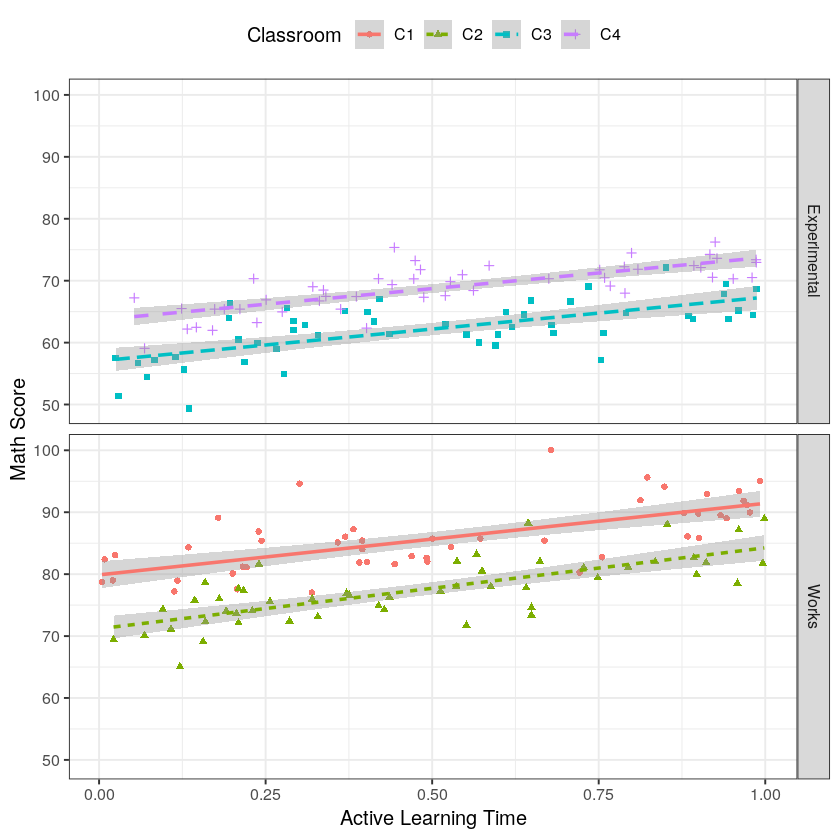

In [74]:
library(ggplot2)
theme_set(theme_bw(base_size = 12, base_family = "")) 

ClassRoom.Active <-ggplot(data = MLM.Data, aes(x = ActiveTime, y=Math,group=Classroom))+
  facet_grid(Told~.)+
  geom_point(aes(colour = Classroom,shape=Classroom))+
  geom_smooth(method = "lm", se = TRUE, aes(colour = Classroom, linetype=Classroom))+
  xlab("Active Learning Time")+ylab("Math Score")+
  theme(legend.position = "top")
ClassRoom.Active

ClassRoom.Support <-ggplot(data = MLM.Data, aes(x = Support, y=Math,group=Classroom))+
 facet_grid(Told~.)+
  geom_point(aes(colour = Classroom, shape=Classroom))+
  geom_smooth(method = "lm", se = TRUE, aes(colour = Classroom,linetype=Classroom))+
  xlab("Support")+ylab("Math Score")+
  theme(legend.position = "top")
#ClassRoom.Support

In [75]:
library(lme4)     #mixed model package by Douglas Bates et al
Model.Null<-lmer(Math ~1+(1|Classroom),  
                   data=MLM.Data, REML=FALSE)
summary(Model.Null)

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: Math ~ 1 + (1 | Classroom)
   Data: MLM.Data

     AIC      BIC   logLik deviance df.resid 
  1222.3   1232.2   -608.2   1216.3      197 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.66017 -0.69735  0.00735  0.68158  2.99470 

Random effects:
 Groups    Name        Variance Std.Dev.
 Classroom (Intercept) 78.44    8.857   
 Residual              23.13    4.809   
Number of obs: 200, groups:  Classroom, 4

Fixed effects:
            Estimate Std. Error t value
(Intercept)   73.551      4.441   16.56

In [76]:
ICC.Model<-function(Model.Name) {
  tau.Null<-as.numeric(lapply(summary(Model.Name)$varcor, diag))
  sigma.Null <- as.numeric(attr(summary(Model.Name)$varcor, "sc")^2)
  ICC.Null <- tau.Null/(tau.Null+sigma.Null)
  return(ICC.Null)
}


In [77]:
lapply(summary(Model.Null)$varcor, diag)
attr(summary(Model.Null)$varcor, "sc")
summary(Model.Null)$varcor

$Classroom
(Intercept) 
   78.44292

[1] 4.80926

 Groups    Name        Std.Dev.
 Classroom (Intercept) 8.8568  
 Residual              4.8093  

In [78]:
#Not mean centered

Model.nm<-lmer(Math ~ActiveTime+(1|Classroom),  
                   data=MLM.Data, REML=FALSE)
summary(Model.nm)

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: Math ~ ActiveTime + (1 | Classroom)
   Data: MLM.Data

     AIC      BIC   logLik deviance df.resid 
  1091.1   1104.3   -541.6   1083.1      196 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.5503 -0.6569 -0.0730  0.6226  3.6403 

Random effects:
 Groups    Name        Variance Std.Dev.
 Classroom (Intercept) 78.82    8.878   
 Residual              11.72    3.423   
Number of obs: 200, groups:  Classroom, 4

Fixed effects:
            Estimate Std. Error t value
(Intercept)  67.9222     4.4641   15.21
ActiveTime   11.2642     0.8154   13.81

Correlation of Fixed Effects:
           (Intr)
ActiveTime -0.091

In [79]:
#Grand mean centered
MLM.Data$ActiveTime.GM<-scale(MLM.Data$ActiveTime,scale=F)

Model.1<-lmer(Math ~ActiveTime.GM+(1|Classroom),  
                   data=MLM.Data, REML=FALSE)
summary(Model.1)

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: Math ~ ActiveTime.GM + (1 | Classroom)
   Data: MLM.Data

     AIC      BIC   logLik deviance df.resid 
  1091.1   1104.3   -541.6   1083.1      196 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.5503 -0.6569 -0.0730  0.6226  3.6403 

Random effects:
 Groups    Name        Variance Std.Dev.
 Classroom (Intercept) 78.82    8.878   
 Residual              11.72    3.423   
Number of obs: 200, groups:  Classroom, 4

Fixed effects:
              Estimate Std. Error t value
(Intercept)    73.5514     4.4455   16.55
ActiveTime.GM  11.2642     0.8154   13.81

Correlation of Fixed Effects:
            (Intr)
ActiveTm.GM 0.000 

In [80]:
anova(Model.Null,Model.1)


,Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Model.Null,3,1222.349,1232.244,-608.1747,1216.349,NA,NA,NA
Model.1,4,1091.107,1104.300,-541.5535,1083.107,133.2424,1,8.001921e-31


In [81]:
library(plyr)
# Cluster mean
MLM.Data<-ddply(MLM.Data,.(Classroom), mutate, ClassSupport = mean(Support))
MLM.Data$Support.CC<-MLM.Data$Support-MLM.Data$ClassSupport

In [82]:
Model.2<-lmer(Math ~ ActiveTime.GM+Support.CC+(1|Classroom),  
              data=MLM.Data, REML=FALSE)
summary(Model.2)

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: Math ~ ActiveTime.GM + Support.CC + (1 | Classroom)
   Data: MLM.Data

     AIC      BIC   logLik deviance df.resid 
  1078.6   1095.1   -534.3   1068.6      195 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.9376 -0.6003  0.0133  0.5959  3.4624 

Random effects:
 Groups    Name        Variance Std.Dev.
 Classroom (Intercept) 78.84    8.879   
 Residual              10.88    3.299   
Number of obs: 200, groups:  Classroom, 4

Fixed effects:
              Estimate Std. Error t value
(Intercept)    73.5514     4.4456   16.55
ActiveTime.GM  11.4325     0.7870   14.53
Support.CC      3.1650     0.8157    3.88

Correlation of Fixed Effects:
            (Intr) AcT.GM
ActiveTm.GM 0.000        
Support.CC  0.000  0.055 

In [83]:
anova(Model.1,Model.2)


,Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Model.1,4,1091.107,1104.300,-541.5535,1083.107,NA,NA,NA
Model.2,5,1078.603,1095.095,-534.3017,1068.603,14.50357,1,0.0001398945


In [84]:
Model.3<-lmer(Math ~ ActiveTime.GM+Support.CC+(1+Support.CC|Classroom),  
              data=MLM.Data, REML=FALSE)
summary(Model.3)

boundary (singular) fit: see ?isSingular


Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: Math ~ ActiveTime.GM + Support.CC + (1 + Support.CC | Classroom)
   Data: MLM.Data

     AIC      BIC   logLik deviance df.resid 
  1064.3   1087.4   -525.2   1050.3      193 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.0342 -0.7269  0.0562  0.5989  3.1819 

Random effects:
 Groups    Name        Variance Std.Dev. Corr
 Classroom (Intercept) 78.85    8.880        
           Support.CC  13.27    3.643    1.00
 Residual               9.91    3.148        
Number of obs: 200, groups:  Classroom, 4

Fixed effects:
              Estimate Std. Error t value
(Intercept)    73.5514     4.4454  16.546
ActiveTime.GM  10.9855     0.7514  14.619
Support.CC      2.9583     1.9811   1.493

Correlation of Fixed Effects:
            (Intr) AcT.GM
ActiveTm.GM 0.000        
Support.CC  0.918  0.021 
convergence code: 0
boundary (singular) fit: see ?isSingular


In [85]:
anova(Model.2,Model.3)


,Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Model.2,5,1078.603,1095.095,-534.3017,1068.603,NA,NA,NA
Model.3,7,1064.303,1087.391,-525.1513,1050.303,18.30077,2,0.0001061791


In [86]:
Model.3a<-lmer(Math ~ ActiveTime.GM+Support.CC+(1+Support.CC||Classroom),  
              data=MLM.Data, REML=FALSE)
summary(Model.3a)

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: 
Math ~ ActiveTime.GM + Support.CC + ((1 | Classroom) + (0 + Support.CC |  
    Classroom))
   Data: MLM.Data

     AIC      BIC   logLik deviance df.resid 
  1071.8   1091.6   -529.9   1059.8      194 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.0272 -0.7003  0.0172  0.5958  3.3308 

Random effects:
 Groups      Name        Variance Std.Dev.
 Classroom   (Intercept) 78.85    8.880   
 Classroom.1 Support.CC  10.69    3.269   
 Residual                10.06    3.171   
Number of obs: 200, groups:  Classroom, 4

Fixed effects:
              Estimate Std. Error t value
(Intercept)    73.5514     4.4454  16.545
ActiveTime.GM  11.1567     0.7662  14.560
Support.CC      2.8910     1.8165   1.591

Correlation of Fixed Effects:
            (Intr) AcT.GM
ActiveTm.GM 0.000        
Support.CC  0.000  0.020 

In [87]:
Model.3a<-lmer(Math ~ ActiveTime.GM+Support.CC+(1+Support.CC||Classroom),  
              data=MLM.Data, REML=FALSE)
summary(Model.3a)

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: 
Math ~ ActiveTime.GM + Support.CC + ((1 | Classroom) + (0 + Support.CC |  
    Classroom))
   Data: MLM.Data

     AIC      BIC   logLik deviance df.resid 
  1071.8   1091.6   -529.9   1059.8      194 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.0272 -0.7003  0.0172  0.5958  3.3308 

Random effects:
 Groups      Name        Variance Std.Dev.
 Classroom   (Intercept) 78.85    8.880   
 Classroom.1 Support.CC  10.69    3.269   
 Residual                10.06    3.171   
Number of obs: 200, groups:  Classroom, 4

Fixed effects:
              Estimate Std. Error t value
(Intercept)    73.5514     4.4454  16.545
ActiveTime.GM  11.1567     0.7662  14.560
Support.CC      2.8910     1.8165   1.591

Correlation of Fixed Effects:
            (Intr) AcT.GM
ActiveTm.GM 0.000        
Support.CC  0.000  0.020 

In [88]:
anova(Model.3,Model.3a)


,Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Model.3a,6,1071.794,1091.584,-529.8968,1059.794,NA,NA,NA
Model.3,7,1064.303,1087.391,-525.1513,1050.303,9.490972,1,0.002064854


In [89]:
Model.4<-lmer(Math ~ ActiveTime.GM*Support.CC+(1+Support.CC||Classroom),  
              data=MLM.Data, REML=FALSE)
summary(Model.4)

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: 
Math ~ ActiveTime.GM * Support.CC + ((1 | Classroom) + (0 + Support.CC |  
    Classroom))
   Data: MLM.Data

     AIC      BIC   logLik deviance df.resid 
  1055.0   1078.1   -520.5   1041.0      193 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.9810 -0.6582 -0.0185  0.5562  3.3230 

Random effects:
 Groups      Name        Variance Std.Dev.
 Classroom   (Intercept) 76.649   8.755   
 Classroom.1 Support.CC  13.797   3.714   
 Residual                 9.087   3.014   
Number of obs: 200, groups:  Classroom, 4

Fixed effects:
                         Estimate Std. Error t value
(Intercept)               73.6073     4.3827  16.795
ActiveTime.GM             11.0667     0.7291  15.178
Support.CC                 3.0609     2.0048   1.527
ActiveTime.GM:Support.CC  11.9355     2.6768   4.459

Correlation of Fixed Effects:
            (Intr) AcT.GM Spp.CC
ActiveTm.GM  0.000              
Support.CC   0.000 

In [90]:
anova(Model.3a,Model.4)


,Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Model.3a,6,1071.794,1091.584,-529.8968,1059.794,NA,NA,NA
Model.4,7,1055.002,1078.090,-520.5009,1041.002,18.7918,1,1.457925e-05


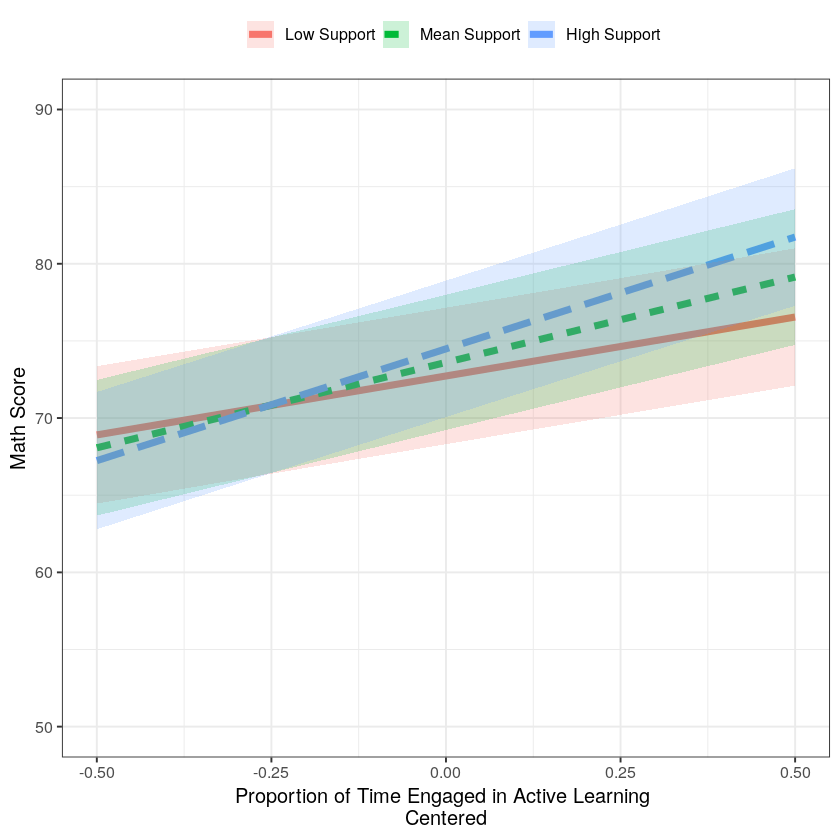

In [91]:
library(effects)
# Set levels of support
SLevels<-c(mean(MLM.Data$Support.CC)-sd(MLM.Data$Support.CC),
                               mean(MLM.Data$Support.CC),
           mean(MLM.Data$Support.CC)+sd(MLM.Data$Support.CC))
#extract fixed effects
Results.Model.4<-Effect(c("ActiveTime.GM","Support.CC"),Model.4,
     xlevels=list(ActiveTime.GM=seq(-.5,.5,.2), 
                  Support.CC=SLevels))
#Convert to data frame for ggplot
Results.Model.4<-as.data.frame(Results.Model.4)
#Label Support for graphing
Results.Model.4$Support.F<-factor(Results.Model.4$Support.CC,
                        levels=SLevels,
                         labels=c("Low Support", "Mean Support", "High Support"))

#Plot fixed effect
Final.Fixed.Plot.1 <-ggplot(data = Results.Model.4, 
                            aes(x = ActiveTime.GM, y =fit, group=Support.F))+
  geom_line(size=2, aes(color=Support.F,linetype=Support.F))+
  coord_cartesian(xlim = c(-.5, .5),ylim = c(50, 90))+ 
  geom_ribbon(aes(ymin=fit-se, ymax=fit+se, group=Support.F, fill=Support.F),alpha=.2)+
  xlab("Proportion of Time Engaged in Active Learning \nCentered")+
  ylab("Math Score")+ 
  theme(legend.position = "top", 
        legend.title=element_blank())
Final.Fixed.Plot.1

In [92]:
library(texreg)


texreg(list(Model.1,Model.2,Model.3a,Model.4), 
       table = FALSE, use.packages = FALSE,
       single.row = FALSE, stars = c(0.001, 0.01, 0.05,0.1),digits=3)

\begin{tabular}{l c c c c }
\hline
 & Model 1 & Model 2 & Model 3 & Model 4 \\
\hline
(Intercept)                 & $73.551^{***}$ & $73.551^{***}$ & $73.551^{***}$ & $73.607^{***}$ \\
                            & $(4.446)$      & $(4.446)$      & $(4.445)$      & $(4.383)$      \\
ActiveTime.GM               & $11.264^{***}$ & $11.433^{***}$ & $11.157^{***}$ & $11.067^{***}$ \\
                            & $(0.815)$      & $(0.787)$      & $(0.766)$      & $(0.729)$      \\
Support.CC                  &                & $3.165^{***}$  & $2.891$        & $3.061$        \\
                            &                & $(0.816)$      & $(1.817)$      & $(2.005)$      \\
ActiveTime.GM:Support.CC    &                &                &                & $11.936^{***}$ \\
                            &                &                &                & $(2.677)$      \\
\hline
AIC                         & 1091.107       & 1078.603       & 1071.794       & 1055.002       \\
BIC                         & 1104.300       & 1095.095       & 1091.584       & 1078.090       \\
Log Likelihood              & -541.554       & -534.302       & -529.897       & -520.501       \\
Num. obs.                   & 200            & 200            & 200            & 200            \\
Num. groups: Classroom      & 4              & 4              & 4              & 4              \\
Var: Classroom (Intercept)  & 78.816         & 78.835         & 78.846         & 76.649         \\
Var: Residual               & 11.719         & 10.883         & 10.057         & 9.087          \\
Var: Classroom.1 Support.CC &                &                & 10.687         & 13.797         \\
\hline
\multicolumn{5}{l}{\scriptsize{$^{***}p<0.001$, $^{**}p<0.01$, $^*p<0.05$, $^{\cdot}p<0.1$}}
\end{tabular}

In [93]:
htmlreg(list(Model.1,Model.2,Model.3a,Model.4),file = "ModelResults.doc", 
        single.row = FALSE, stars = c(0.001, 0.01, 0.05,0.1),digits=3,
        inline.css = FALSE, doctype = TRUE, html.tag = TRUE, 
        head.tag = TRUE, body.tag = TRUE)

The table was written to the file 'ModelResults.doc'.



In [94]:
Model.5<-lmer(Math ~ ActiveTime.GM*Support.CC+(1+ActiveTime.GM+Support.CC||Classroom),  
              data=MLM.Data, REML=FALSE)
summary(Model.5)

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: 
Math ~ ActiveTime.GM * Support.CC + ((1 | Classroom) + (0 + ActiveTime.GM |  
    Classroom) + (0 + Support.CC | Classroom))
   Data: MLM.Data

     AIC      BIC   logLik deviance df.resid 
  1056.7   1083.1   -520.3   1040.7      192 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.8928 -0.6345  0.0072  0.5731  3.3479 

Random effects:
 Groups      Name          Variance Std.Dev.
 Classroom   (Intercept)   76.7173  8.759   
 Classroom.1 ActiveTime.GM  0.9881  0.994   
 Classroom.2 Support.CC    14.5526  3.815   
 Residual                   8.9915  2.999   
Number of obs: 200, groups:  Classroom, 4

Fixed effects:
                         Estimate Std. Error t value
(Intercept)               73.6159     4.3846  16.790
ActiveTime.GM             11.0832     0.8797  12.598
Support.CC                 3.1048     2.0515   1.513
ActiveTime.GM:Support.CC  12.0019     2.6642   4.505

Correlation of Fixed Effects

In [95]:
anova(Model.4,Model.5)


,Df,AIC,BIC,logLik,deviance,Chisq,Chi Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Model.4,7,1055.002,1078.09,-520.5009,1041.002,NA,NA,NA
Model.5,8,1056.694,1083.08,-520.3468,1040.694,0.3081585,1,0.5788124
